# Histogrammi

Eräs erittäin tärkeä työkalu data-analyysiin on **histogrammi**. Histogrammi on kaavio, jossa on luokiteltu tietyn muuttujan arvoja erikokoisiksi pylväiksi. Luokat määritellään ennen kaavion piirtämistä. Histogrammissa luokat ovat vaaka-akselilla suuruusjärjestyksessä, ja niiden esiintyvyys on pystyakselilla. Pylvään pinta-ala kertoo sen, kuinka suuri osuus datasta kuuluu kyseiseen luokkaan.

Käytetään esimerkkinä NHL-pelaajien pelitietoja. Tiedot ovat peräisin QuantHockey-sivustolta (https://www.quanthockey.com/nhl/players/a.php), ja se pitää sisällään tietoa yli 8000:sta pelaajasta.

In [2]:
#Otetaan käyttöön tarvittavat kirjastot.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Ladataan käytettävä tiedosto muuttujaan.
nhl_data = pd.read_csv("https://raw.githubusercontent.com/opendata-education/Python-ja-Jupyter/main/materiaali/harjoitukset/NHL-players.csv")
nhl_data.head()

,Name,Pos,Birthdate,Birth City,Country,GP,G,A,P,PIM
0,"Aalto, Antti",F,03/04/1975,Lappeenranta,Finland,151,11,17,28,52
1,"Abbott, George",G,08/03/1911,"Sydenham, Ontario",Canada,1,0,0,0,0
2,"Abbott, Reg",F,02/04/1930,"Winnipeg, Manitoba",Canada,3,0,0,0,0
3,"Abbott, Spencer",F,04/30/1988,"Hamilton, Ontario",Canada,2,0,0,0,0
4,"Abdelkader, Justin",F,02/25/1987,"Muskegon, Michigan",United States,739,106,146,252,608


Haluamme tarkastella pelaajien syntymäkuukausien jakaumaa. Olisiko mahdollista, että joinakin kuukausina syntyneitä pelaajia on huomattavasti enemmän kuin muina kuukausina syntyneitä? 

In [4]:
# Otetaan datasta erikseen syntymäpäivät, ja muutetaan sitä niin, että jäljelle jää vain kuukaudet.
syntymapaivat = pd.to_datetime(nhl_data['Birthdate'],format='%m/%d/%Y')
kuukaudet = syntymapaivat.dt.month
kuukaudet.head()

0    3
1    8
2    2
3    4
4    2
Name: Birthdate, dtype: int64

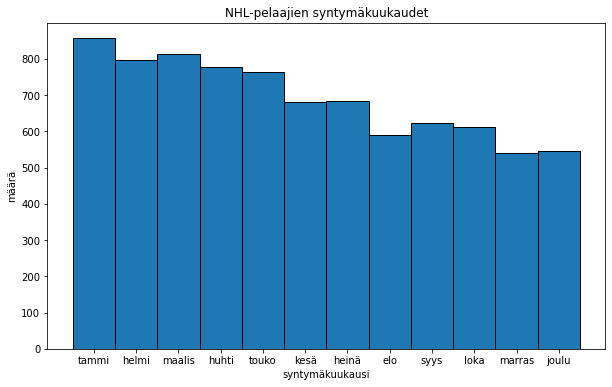

In [5]:
# Piirretään histogrammi pelaajien syntymäkuukausista
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
bins = np.arange(1,14)
plt.hist(kuukaudet, bins=bins,edgecolor='k', align='left')
ax.set_xticks(bins[:-1])
ax.set_xticklabels(['tammi','helmi','maalis','huhti','touko','kesä','heinä','elo','syys','loka','marras','joulu'])
plt.title('NHL-pelaajien syntymäkuukaudet')
plt.xlabel('syntymäkuukausi')
plt.ylabel('määrä')
plt.show()

Hienoa, saimme valmiiksi ensimmäisen histogrammin!
Todetaan, että NHL-pelaajien keskuudessa alkuvuonna syntyneitä on huomattavasti enemmän kuin loppuvuotena syntyneitä, ja määrä laskee tasaisesti, mitä pidemmälle vuotta mennään. Osaatko sanoa, mistä tämä voisi johtua?

## Luokat
Histogrammeissa on tärkeää, että luokkia (englanniksi "*bins*") on oikea määrä. Esimerkiksi yllä olevassa kaaviossa ei olisi järkeä, jos siinä olisi enemmän tai vähemmän kuin 12 luokkaa, sillä kukin luokka vastaa yhtä kuukautta. Yleensä luokkien määrän valitseminen ei ole aivan näin tarkkaa, mutta silloinkin oikean määrän valitseminen on tärkeää. Jos luokkia on liian vähän, dataa ei voi eritellä tarpeeksi ja hyödyllisen analyysin tekeminen on vaikeaa. Jos luokkia taas on liikaa, kaaviosta tulee liian monimutkainen.

Tarkastellaan seuraavaksi NHL-pelaajien pelattujen pelien määrää. Kokeillaan piirtää histogrammi eri luokkien määrällä. Pythonissa tämä onnistuu vaihtamalla bins-muuttujan kohdalle sopiva arvo.

<function matplotlib.pyplot.show(close=None, block=None)>

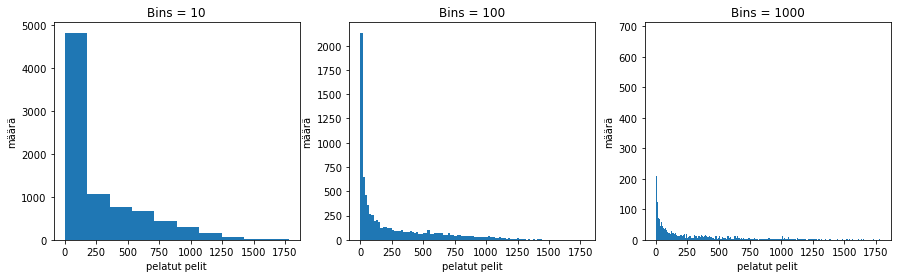

In [7]:
pelatut_pelit = nhl_data['GP']
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1.set_xlabel('pelatut pelit')
ax1.set_ylabel('määrä')
ax1.hist(pelatut_pelit, bins = 10)
ax1.set_title('Bins = 10')
ax2.set_xlabel('pelatut pelit')
ax2.set_ylabel('määrä')
ax2.hist(pelatut_pelit, bins = 100)
ax2.set_title('Bins = 100')
ax3.set_xlabel('pelatut pelit')
ax3.set_ylabel('määrä')
ax3.hist(pelatut_pelit, bins = 1000)
ax3.set_title('Bins = 1000')
plt.show

Sopiva luokkien määrä riippuu tilanteesta. Yllä olevassa esimerkissä vasemmanpuoleinen kuva antaa melko vähän informaatiota, sillä luokkia on vain kymmenen. 
Oikeanpuoleisessa kuvassa on taas liikaa luokkia. Useimpiin tarkoitusperiin paras yllä olevista on keskellä oleva histogrammi.


## Ero pylväsdiagrammeihin

Toinen tärkeä työkalu data-analyysiin on **pylväsdiagrammi**. On tärkeää osata tunnistaa histogrammin ja pylväsdiagrammin ero.
Pylväsdiagrammi eroaa histogrammista siten, että siinä data erotellaan erillisiksi kategorioiksi, joiden välillä ei ole mitään tiettyä järjestystä. Kategoriat muodostavat pylväitä, joiden korkeus kertoo kyseisen kategorian esiintyvyyden. Pylväsdiagrammin esitystapa eroaa histogrammista siten, että pylväät eivät koske toisiaan. Pylväiden järjestystä voi myös siirrellä, sillä niillä ei ole välttämättä tiettyä järjestystä.

Piirretään seuraavaksi pylväsdiagrammi pelaajien maista.

0             Finland
1              Canada
2              Canada
3              Canada
4       United States
            ...      
8283    United States
8284           Canada
8285    United States
8286           Russia
8287           Russia
Name: Country, Length: 8288, dtype: object


Text(0, 0.5, 'Lukumäärä')

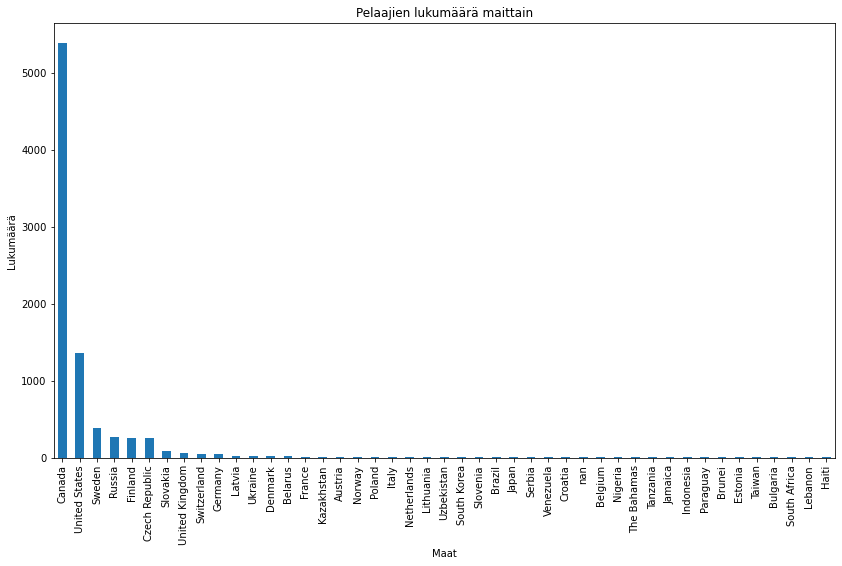

In [8]:

maat = nhl_data['Country'].astype(str)
print(maat)
ax = maat.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Pelaajien lukumäärä maittain")
ax.set_xlabel("Maat")
ax.set_ylabel("Lukumäärä")


Yllä olevassa kaaviossa maat on jaoteltu sen mukaan, kuinka monta NHL-pelaajaa on sieltä kotoisin. Tämä ei ole kuitenkaan pakollista, ja aivan yhtä hyvin voisimme jaotella maat esimerkiksi aakkosjärjestyksen mukaan.


## Jakaumat

Histogrammien avulla pystytään usein arvioimaan jakaumaan, joka kuvaa muuttujan eri arvojen todennäköisyyttä. Mitä enemmän meillä on dataa, sitä paremmin pystymme arvioimaan jakaumaa. Käytetään esimerkkinä NHL-pelaajien painoja. Tehdään animaatio, jonka avulla näkee, kuinka jakauma muodostuu, kun mittausten määrä kasvaa. Data on kerätty Jatkoaika.com -sivustolta 22.6.2022.

In [9]:
# Talletetaan nykyisten NHL-pelaajien biometrinen data muuttujaan
nhl_biometrics = pd.read_csv("https://raw.githubusercontent.com/opendata-education/Python-ja-Jupyter/main/materiaali/harjoitukset/NHL_biometrics.csv")
nhl_biometrics.head()

,Player,Team,Age,Height (cm),Weight (kg),Stick
0,Nick Abruzzese,Toronto,22,178,79,left
1,Noel Acciari,Florida,30,178,95,right
2,Sebastian Aho,NY Islanders,26,177,83,left
3,Sebastian Aho,Carolina,24,183,80,left
4,Jake Allen,Montreal,31,188,86,left


In [14]:
painot = nhl_biometrics['Weight (kg)']

0    79
1    95
2    83
3    80
4    86
Name: Weight (kg), dtype: int64

In [17]:
# Tuodaan tarvittavat kirjastot
import matplotlib.animation as animation
from scipy.stats import norm

def updt_hist(num, painot):
    plt.cla()
    plt.xlim((70,120))
    plt.hist(painot[:num*10], bins = 50)
    plt.gca().set_title('Normaalijakautuman muodostuminen pelaajien painoista')
    plt.gca().set_ylabel('määrä')
    plt.gca().set_xlabel('paino (kg)')

In [20]:
%%capture

# Luodaan animaatio
fig = plt.figure(figsize=(15,10))
anim = animation.FuncAnimation(fig, updt_hist, frames = 100, fargs = (painot,))

from IPython.display import HTML
HTML(anim.to_jshtml())

In [21]:
HTML(anim.to_jshtml())

Pelaajien painot näyttävät noudattavan **normaalijakaumaa**. Normaalijakauma eli Gaussin jakauma esiintyy kaikenlaisissa ilmiöissä ihmisten painoista ja pituuksista hiukkasfysiikkaan. Datamäärän kasvaessa kuvaaja muistuttaa normaalijakaumaa yhä enemmän.

Kokeillaan  sovittaa funktio, joka vastaa jakaumaa.

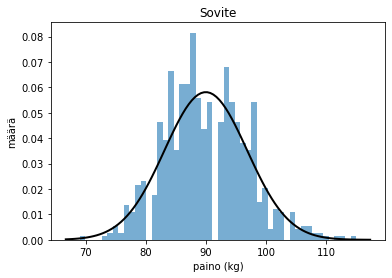

In [22]:
#
mu, std = norm.fit(painot)
plt.hist(painot, bins=50, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Sovite")
plt.xlabel("paino (kg)")
plt.ylabel("määrä")

plt.show()


In [ ]:
# Toinen tapa tehdä animaatio. Matlplotlib notebook saa animaation toimimaan, 
# mutta sekoittaa vähän, jos notebookissa suorittaa vanhoja soluja uudestaan, joten ei käytetä tätä
%matplotlib notebook
from IPython.display import display, clear_output

n = len(painot)
fig = plt.figure(figsize=(14,10))

def update(nykyinen):
    if nykyinen == n:
        a.event_source.stop()
    plt.cla()
    #bins = np.arange(50, 120, 1)
    plt.hist(painot[:nykyinen*10], bins = 50)
    plt.axis([70, 120, 0, 90])
    plt.gca().set_title('Jakauman muodostuminen pelaajien painoista')
    plt.gca().set_ylabel('määrä')
    plt.gca().set_xlabel('paino')
    plt.gca().annotate('n={}'.format(nykyinen), [3,27])

a = animation.FuncAnimation(fig, update, interval = 0.1)
plt.show()